In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
import torch
from sklearn.model_selection import cross_val_score
torch.__version__

'1.9.1+cpu'

In [3]:
np.random.seed(123)
torch.manual_seed(123)

In [4]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

In [5]:
classe.shape

(569, 1)

C:\Users\jason\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


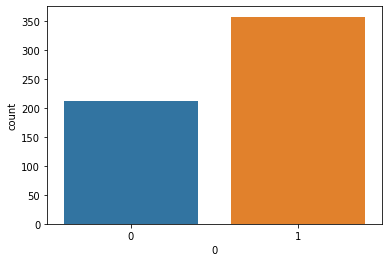

In [6]:
sns.countplot(classe['0']);

In [7]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [8]:
classe.shape

(569,)

In [9]:
type(previsores)

numpy.ndarray

In [10]:
#O skorch é uma biblioteca que permite que o pytorch construa a estrutura da rede neural com o uso de validação cruzada.
class classificador_torch(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.dense0 = nn.Linear(30,16)
        torch.nn.init.uniform_(self.dense0.weight)
        self.activation0 = nn.ReLU()
        self.dense1 = nn.Linear(16,16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        self.dense2 = nn.Linear(16,1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.activation2 = nn.ReLU()
        self.output = nn.Sigmoid()
        
# As instruções abaixo são para cada uma das camadas acima se comunicarem:
    
    def forward(self, X):
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X

In [11]:
classificador_sklearn = NeuralNetBinaryClassifier(module = classificador_torch,
                                                 criterion = torch.nn.BCELoss,
                                                 optimizer = torch.optim.Adam,
                                                 lr = 0.001,
                                                 optimizer__weight_decay = 0.0001,
                                                 max_epochs=100,
                                                 batch_size=10,
                                                 train_split=False)
#O sklearn utilizará o classificador_sklearn para fazer a validação cruzada de fato.

In [12]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv=10, scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0470
      2       37.1094  0.0470
      3       37.1094  0.0450
      4       37.1094  0.0460
      5       37.1094  0.0470
      6       37.1094  0.0460
      7       37.1094  0.0450
      8       37.1094  0.0460
      9       37.1094  0.0450
     10       37.1094  0.0450
     11       37.1094  0.0460
     12       37.1094  0.0460
     13       37.1094  0.0450
     14       37.1094  0.0470
     15       37.1094  0.0460
     16       37.1094  0.0470
     17       37.1094  0.0526
     18       37.1094  0.0474
     19       37.1094  0.0471
     20       37.1094  0.0485
     21       37.1094  0.0473
     22       37.1094  0.0490
     23       37.1094  0.0470
     24       37.1094  0.0480
     25       13.5893  0.0460
     26        0.5466  0.0480
     27        0.5314  0.0480
     28        0.4981  0.0470
     29        0.4820  0.0470
     30        0.4769  0.0460
     31        0.4528  0.0460
     32   

     27        0.6235  0.0450
     28        0.6243  0.0450
     29        0.6086  0.0440
     30        0.5653  0.0460
     31        0.5706  0.0440
     32        0.5596  0.0450
     33        0.5521  0.0450
     34        0.5418  0.0470
     35        0.4872  0.0440
     36        0.4783  0.0470
     37        0.4510  0.0450
     38        0.4477  0.0440
     39        0.4327  0.0440
     40        0.4212  0.0450
     41        0.4046  0.0460
     42        0.3942  0.0450
     43        0.3803  0.0450
     44        0.3697  0.0460
     45        0.3587  0.0450
     46        0.3479  0.0450
     47        0.3379  0.0450
     48        0.3312  0.0450
     49        0.3262  0.0450
     50        0.3202  0.0440
     51        0.3147  0.0460
     52        0.3077  0.0450
     53        0.3037  0.0460
     54        0.3002  0.0450
     55        0.2969  0.0450
     56        0.2934  0.0460
     57        0.2890  0.0460
     58        0.2850  0.0460
     59        0.2813  0.0450
     60   

     66        0.2059  0.0450
     67        0.2077  0.0460
     68        0.2035  0.0450
     69        0.2066  0.0460
     70        0.2057  0.0450
     71        0.2006  0.0460
     72        0.1941  0.0460
     73        0.1954  0.0470
     74        0.1945  0.0470
     75        0.1941  0.0460
     76        0.1906  0.0450
     77        0.1968  0.0460
     78        0.1929  0.0460
     79        0.1976  0.0470
     80        0.2013  0.0460
     81        0.2056  0.0450
     82        0.1948  0.0450
     83        0.1816  0.0470
     84        0.1774  0.0450
     85        0.1821  0.0460
     86        0.1847  0.0450
     87        0.1880  0.0460
     88        0.1733  0.0460
     89        0.1718  0.0460
     90        0.1761  0.0460
     91        0.1699  0.0460
     92        0.1656  0.0460
     93        0.1677  0.0460
     94        0.1591  0.0460
     95        0.1643  0.0470
     96        0.1594  0.0460
     97        0.1615  0.0470
     98        0.1611  0.0460
     99   

      2       37.3047  0.0450
      3       37.3047  0.0450
      4       37.3047  0.0450
      5       37.3047  0.0450
      6       37.3047  0.0450
      7       37.3047  0.0450
      8       37.3047  0.0450
      9       37.3047  0.0450
     10       37.3047  0.0450
     11       37.3047  0.0450
     12       37.3047  0.0470
     13       37.3047  0.0450
     14       37.3047  0.0440
     15       37.3047  0.0450
     16       37.3047  0.0440
     17       37.3047  0.0520
     18       37.3047  0.0460
     19       37.3047  0.0440
     20       37.3047  0.0470
     21       37.3047  0.0450
     22       18.0366  0.0450
     23        0.6755  0.0450
     24        0.5573  0.0440
     25        0.5187  0.0450
     26        0.4976  0.0440
     27        0.4796  0.0450
     28        0.4631  0.0450
     29        0.4437  0.0450
     30        0.4226  0.0450
     31        0.4045  0.0460
     32        0.3900  0.0450
     33        0.3746  0.0450
     34        0.3646  0.0470
     35   

     49        0.6132  0.0440
     50        0.6132  0.0450
     51        0.6132  0.0460
     52        0.6131  0.0470
     53        0.6131  0.0450
     54        0.6131  0.0450
     55        0.6131  0.0450
     56        0.6131  0.0450
     57        0.6130  0.0470
     58        0.6130  0.0450
     59        0.6130  0.0460
     60        0.6130  0.0450
     61        0.6130  0.0460
     62        0.6130  0.0450
     63        0.6130  0.0450
     64        0.6130  0.0450
     65        0.6130  0.0460
     66        0.6130  0.0450
     67        0.6130  0.0450
     68        0.6130  0.0460
     69        0.6130  0.0450
     70        0.6130  0.0450
     71        0.6130  0.0450
     72        0.6130  0.0460
     73        0.6130  0.0460
     74        0.6130  0.0480
     75        0.6130  0.0460
     76        0.6130  0.0450
     77        0.6130  0.0450
     78        0.6130  0.0460
     79        0.6130  0.0450
     80        0.6130  0.0470
     81        0.6130  0.0450
     82   

In [13]:
resultados

array([0.84210526, 0.61403509, 0.89473684, 0.63157895, 0.89473684,
       0.89473684, 0.87719298, 0.92982456, 0.63157895, 0.625     ])

In [14]:
media = resultados.mean()
media

0.7835526315789474

In [15]:
desvio = resultados.std()
desvio

0.13066955478793235

In [16]:
# O Dropout visa diminuir o efeito de overfitting em cima dos calculos das redes neurais

class classificador_torch(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.dense0 = nn.Linear(30,16)
        torch.nn.init.uniform_(self.dense0.weight)
        self.activation0 = nn.ReLU()
        self.dropout0 = nn.Dropout(0.2)
        self.dense1 = nn.Linear(16,16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.dense2 = nn.Linear(16,1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.activation2 = nn.ReLU()
        self.output = nn.Sigmoid()
        
    
    def forward(self, X):
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dropout0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dropout1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X

In [17]:
classificador_sklearn = NeuralNetBinaryClassifier(module = classificador_torch,
                                                 criterion = torch.nn.BCELoss,
                                                 optimizer = torch.optim.Adam,
                                                 lr = 0.001,
                                                 optimizer__weight_decay = 0.0001,
                                                 max_epochs=100,
                                                 batch_size=10,
                                                 train_split=False)

In [21]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv=10, scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0500
      2       37.1094  0.0490
      3       37.1094  0.0500
      4       37.1094  0.0490
      5       37.1094  0.0490
      6       37.1094  0.0510
      7       37.1094  0.0500
      8       37.1094  0.0500
      9       37.1094  0.0500
     10       37.1094  0.0500
     11       37.1094  0.0500
     12       37.1094  0.0500
     13       37.1094  0.0490
     14       37.1094  0.0490
     15       37.1094  0.0500
     16       37.1094  0.0530
     17       37.1094  0.0490
     18       37.1094  0.0490
     19       37.1094  0.0490
     20       37.1094  0.0500
     21       37.1094  0.0580
     22       36.9421  0.0530
     23       10.0885  0.0500
     24        0.5880  0.0500
     25        0.5703  0.0500
     26        0.5269  0.0490
     27        0.5268  0.0500
     28        0.5243  0.0500
     29        0.5198  0.0520
     30        0.5109  0.0510
     31        0.5149  0.0510
     32   

     44        0.3828  0.0500
     45        0.3983  0.0510
     46        0.3740  0.0490
     47        0.3694  0.0510
     48        0.3474  0.0500
     49        0.3726  0.0500
     50        0.3419  0.0490
     51        0.3555  0.0500
     52        0.3378  0.0510
     53        0.3418  0.0500
     54        0.3151  0.0490
     55        0.3117  0.0500
     56        0.3162  0.0500
     57        0.3109  0.0510
     58        0.2947  0.0500
     59        0.2915  0.0500
     60        0.2995  0.0490
     61        0.3057  0.0500
     62        0.2914  0.0490
     63        0.3102  0.0500
     64        0.3036  0.0500
     65        0.2682  0.0510
     66        0.2909  0.0500
     67        0.3020  0.0520
     68        0.2629  0.0500
     69        0.2972  0.0500
     70        0.2665  0.0510
     71        0.2974  0.0500
     72        0.2751  0.0530
     73        0.2877  0.0500
     74        0.2931  0.0490
     75        0.2570  0.0500
     76        0.2883  0.0500
     77   

     89        0.2532  0.0500
     90        0.2978  0.0520
     91        0.3117  0.0500
     92        0.2937  0.0500
     93        0.2613  0.0500
     94        0.2715  0.0500
     95        0.2336  0.0510
     96        0.2708  0.0500
     97        0.2583  0.0500
     98        0.2536  0.0500
     99        0.2687  0.0500
    100        0.2662  0.0500
  epoch    train_loss     dur
-------  ------------  ------
      1       37.3047  0.0490
      2       37.3047  0.0490
      3       37.3047  0.0500
      4       37.3047  0.0500
      5       37.3047  0.0500
      6       37.3047  0.0490
      7       37.3047  0.0500
      8       37.3047  0.0490
      9       37.3047  0.0520
     10       37.3047  0.0490
     11       37.3047  0.0500
     12       37.3047  0.0500
     13       37.3047  0.0500
     14       37.3047  0.0490
     15       37.3047  0.0500
     16       37.3047  0.0500
     17       37.3047  0.0500
     18       37.3047  0.0490
     19       37.3047  0.0510
     20   

     39        0.5036  0.0500
     40        0.4671  0.0500
     41        0.4855  0.0530
     42        0.4529  0.0500
     43        0.4484  0.0490
     44        0.4427  0.0500
     45        0.4106  0.0500
     46        0.4252  0.0520
     47        0.4023  0.0500
     48        0.4005  0.0490
     49        0.3796  0.0500
     50        0.3916  0.0490
     51        0.3590  0.0490
     52        0.3850  0.0500
     53        0.3829  0.0500
     54        0.3655  0.0500
     55        0.3536  0.0500
     56        0.3750  0.0500
     57        0.3675  0.0490
     58        0.3535  0.0500
     59        0.3563  0.0490
     60        0.3819  0.0500
     61        0.3448  0.0510
     62        0.3285  0.0510
     63        0.3453  0.0530
     64        0.3551  0.0540
     65        0.3086  0.0510
     66        0.3448  0.0540
     67        0.3233  0.0510
     68        0.3269  0.0520
     69        0.3610  0.0500
     70        0.3386  0.0500
     71        0.3291  0.0500
     72   

     85        0.2924  0.0500
     86        0.3051  0.0500
     87        0.2947  0.0500
     88        0.2881  0.0500
     89        0.3741  0.0490
     90        0.2968  0.0500
     91        0.3405  0.0500
     92        0.2743  0.0500
     93        0.3039  0.0500
     94        0.3298  0.0530
     95        0.2875  0.0500
     96        0.2846  0.0500
     97        0.3077  0.0520
     98        0.3005  0.0500
     99        0.2988  0.0500
    100        0.3071  0.0500


In [22]:
media = resultados.mean()
desvio = resultados.std()
media, desvio
#Observe que há uma melhoria no resultado em relação aos cálulos anteriores.
#O Dropout elimina alguns neurônios da camada oculta permitindo um afinamento dos cálculos para definição do modelo de ML.
#Caso a operação da validação seja executada novamente, os valores da media e o desvio poderão mudar.

(0.8770050125313282, 0.03671492078682881)

In [23]:
resultados

array([0.84210526, 0.80701754, 0.84210526, 0.9122807 , 0.87719298,
       0.92982456, 0.85964912, 0.89473684, 0.9122807 , 0.89285714])